<a href="https://colab.research.google.com/github/fairuznawar122/World-Happiness-Classification/blob/main/World_Happiness_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Dataset from Kaggle

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import os
import shutil

# Define paths
drive_path = "/content/drive/My Drive/kaggle.json"
kaggle_path = "/root/.kaggle/kaggle.json"

# Create .kaggle directory if it doesn't exist
os.makedirs("/root/.kaggle", exist_ok=True)

# Copy the kaggle.json file
shutil.copy(drive_path, kaggle_path)

# Set the correct permissions
os.chmod(kaggle_path, 600)


In [8]:
!kaggle datasets download -d mathurinache/world-happiness-report

Dataset URL: https://www.kaggle.com/datasets/mathurinache/world-happiness-report
License(s): CC0-1.0
  0% 0.00/67.4k [00:00<?, ?B/s]
100% 67.4k/67.4k [00:00<00:00, 69.0MB/s]


In [9]:
import zipfile
with zipfile.ZipFile("world-happiness-report.zip", "r") as zip_ref:
    zip_ref.extractall("world-happiness-report")


### User Input Columns

In [10]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display

selected_df = pd.DataFrame()
# Create multi-select widget for column selection
column_selector = widgets.SelectMultiple(
    options=df.columns,
    value=[df.columns[0]],  # Default selection
    description='Select Columns:',
    style={'description_width': 'initial'},  # Adjust description width
    layout=widgets.Layout(
        width='70%',  # Set width
        height='auto',  # Set height
        border='2px solid black',  # Border style
        padding='10px',  # Padding inside box
        margin='20px auto',  # Margin around box
    )
)

# Output widget to display the selected columns
output = widgets.Output()

def show_selected_columns(change):
    with output:
        output.clear_output()  # Clear previous output
        selected_columns = list(column_selector.value)  # Get selected columns

        if selected_columns:
            print()
            display(df[selected_columns].head())  # Show first 5 rows
        else:
            print("⚠️ No columns selected!")

# Attach the function to update on selection
column_selector.observe(show_selected_columns, names='value')

# Button to save the selected columns

def save_selected_columns(b):
    selected_columns = list(column_selector.value)

    if not selected_columns:
        print("⚠️ Please select at least one column!")
        return
    global selected_df
    # selected_df = pd.concat([df[selected_columns],selected_df], axis=1)
    selected_df = df[selected_columns]
    # print()
    # print()
    # print(selected_df.head())
    print("✅ Saved selected columns to \"selected_df\" dataframe!")




save_button = widgets.Button(
    description="💾 Save Selected Columns",
    button_style="info",  # 'success' = Green, 'info' = Blue, 'warning' = Orange, 'danger' = Red
    tooltip="Click to save selected columns",
    icon="check",  # Adds a checkmark icon
    layout=widgets.Layout(width='250px', height='40px'),  # Adjust button size
    margin='20px auto',  # Margin around box
)
print()
# save_button = widgets.Button(description="Confirm Selection")
save_button.on_click(save_selected_columns)
print()
print()
# Display everything
display(column_selector, output, save_button)


SelectMultiple(description='Select Columns:', index=(0,), layout=Layout(border='2px solid black', height='auto…

Output()

Button(button_style='info', description='💾 Save Selected Columns', icon='check', layout=Layout(height='40px', …

### Categorizing the Countries

In [11]:
year = input("Enter the Year: ")
filename = "world-happiness-report/" + year + ".csv"

Enter the Year: 2022


In [23]:
import pandas as pd
df = pd.read_csv(filename)
df.head()

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,1,Finland,"7,821","7,886","7,756","2,518","1,892","1,258","0,775","0,736","0,109","0,534"
1,2,Denmark,"7,636","7,710","7,563","2,226","1,953","1,243","0,777","0,719","0,188","0,532"
2,3,Iceland,"7,557","7,651","7,464","2,320","1,936","1,320","0,803","0,718","0,270","0,191"
3,4,Switzerland,"7,512","7,586","7,437","2,153","2,026","1,226","0,822","0,677","0,147","0,461"
4,5,Netherlands,"7,415","7,471","7,359","2,137","1,945","1,206","0,787","0,651","0,271","0,419"


In [13]:
possible_column_names = ['Country', 'Country or region', 'Country name']

In [24]:
# Function to check, extract and delete the column
def extract_and_delete_column(df, possible_column_names):
    for name in possible_column_names:
        if name in df.columns:
            extracted_column = df[name]  # Extract column
            df.drop(name, axis=1, inplace=True)  # Delete the column from df
            print(f"✅ Column '{name}' extracted and deleted from df.")
            return extracted_column
    print(f"⚠️ Column not found from: {possible_column_names}")
    return None

final_df = extract_and_delete_column(df, possible_column_names)
final_df = pd.DataFrame(final_df)

split_size = len(final_df) // 3
categories = ['Strong Happy'] * split_size + ['Moderate Happy'] * split_size + ['Weak Happy'] * (len(final_df) - 2 * split_size)
final_df['Category'] = categories

final_df
# selected_df = pd.DataFrame()
# # Check result
# if extracted_column is not None:
#     print("Extracted column:")
#     print(extracted_column)

# # Display the updated DataFrame
# print("\nUpdated DataFrame after deletion:")
# print(df)

✅ Column 'Country' extracted and deleted from df.


,Country,Category
0,Finland,Strong Happy
1,Denmark,Strong Happy
2,Iceland,Strong Happy
3,Switzerland,Strong Happy
4,Netherlands,Strong Happy
...,...,...
142,Rwanda*,Weak Happy
143,Zimbabwe,Weak Happy
144,Lebanon,Weak Happy
145,Afghanistan,Weak Happy


### Data Processing


In [25]:
if(year=="2015"):
  df.drop("Region", axis=1, inplace=True)
  df.drop("Happiness Rank", axis=1, inplace=True)
  df.drop("Dystopia Residual", axis=1, inplace=True)
  df.drop("Standard Error", axis=1, inplace=True)
  df = df.rename(columns={'Economy (GDP per Capita)': 'Economy'})
  df = df.rename(columns={'Trust (Government Corruption)': 'Trust'})
  df = df.rename(columns={'Health (Life Expectancy)': 'Health'})

if(year=="2018"):
  df.drop("Overall rank", axis=1, inplace=True)
  #rename
  df = df.rename(columns={'Score': 'Happiness Score'})
  df = df.rename(columns={'Country or region': 'Country'})
  df = df.rename(columns={'Healthy life expectancy': 'Health'})
  df = df.rename(columns={'Perceptions of corruption': 'Trust'})
  df = df.rename(columns={'Freedom to make life choices': 'Freedom'})
  df = df.rename(columns={'Social support': 'Social Support'})
  df = df.rename(columns={'GDP per capita': 'Economy'})

if(year=="2020"):
  df.drop("Regional indicator", axis=1, inplace=True)
  df.drop("Standard error of ladder score", axis=1, inplace=True)
  df.drop("upperwhisker", axis=1, inplace=True)
  df.drop("lowerwhisker", axis=1, inplace=True)
  df.drop("Ladder score in Dystopia", axis=1, inplace=True)
  df.drop("Dystopia + residual", axis=1, inplace=True)
  df.drop("Explained by: Log GDP per capita", axis=1, inplace=True)
  df.drop("Explained by: Social support", axis=1, inplace=True)
  df.drop("Explained by: Healthy life expectancy", axis=1, inplace=True)
  df.drop("Explained by: Freedom to make life choices", axis=1, inplace=True)
  df.drop("Explained by: Generosity", axis=1, inplace=True)
  df.drop("Explained by: Perceptions of corruption", axis=1, inplace=True)
  #rename
  df = df.rename(columns={'Country name': 'Country'})
  df = df.rename(columns={'Ladder score': 'Happiness Score'})
  df = df.rename(columns={'Healthy life expectancy': 'Health'})
  df = df.rename(columns={'Perceptions of corruption': 'Trust'})
  df = df.rename(columns={'Freedom to make life choices': 'Freedom'})
  df = df.rename(columns={'Social support': 'Social Support'})
  df = df.rename(columns={'Logged GDP per capita': 'Economy'})

if(year=="2022"):
  df.drop("RANK", axis=1, inplace=True)
  df.drop("Whisker-high", axis=1, inplace=True)
  df.drop("Whisker-low", axis=1, inplace=True)
  df.drop("Dystopia (1.83) + residual", axis=1, inplace=True)
  #rename
  df = df.rename(columns={'Explained by: GDP per capita': 'Economy'})
  df = df.rename(columns={'Explained by: Social support': 'Social Support'})
  df = df.rename(columns={'Explained by: Healthy life expectancy': 'Health'})
  df = df.rename(columns={'Explained by: Freedom to make life choices': 'Freedom'})
  df = df.rename(columns={'Explained by: Generosity': 'Generosity'})
  df = df.rename(columns={'Explained by: Perceptions of corruption': 'Trust'})
  df = df.rename(columns={'Happiness score': 'Happiness Score'})

  # To fix the numerical values in the data
  for column in df.select_dtypes(include=['object']).columns:
    df[column] = df[column].str.replace(',', '.')

  # Convert all columns to numeric (excluding non-numeric columns like country names)
  for column in df.select_dtypes(include=['object']).columns:
    try:
        df[column] = pd.to_numeric(df[column])
    except ValueError:
        # Handle the case if a column can't be converted (keep it as is)
        pass
  df = df[:-1]


In [26]:
df

,Happiness Score,Economy,Social Support,Health,Freedom,Generosity,Trust
0,7.821,1.892,1.258,0.775,0.736,0.109,0.534
1,7.636,1.953,1.243,0.777,0.719,0.188,0.532
2,7.557,1.936,1.320,0.803,0.718,0.270,0.191
3,7.512,2.026,1.226,0.822,0.677,0.147,0.461
4,7.415,1.945,1.206,0.787,0.651,0.271,0.419
...,...,...,...,...,...,...,...
141,3.471,1.503,0.815,0.280,0.571,0.012,0.102
142,3.268,0.785,0.133,0.462,0.621,0.187,0.544
143,2.995,0.947,0.690,0.270,0.329,0.106,0.105
144,2.955,1.392,0.498,0.631,0.103,0.082,0.034


In [17]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/1NBzi1DXfBZNycEy8oJZSQgVhYp6o24ae-opX-JdSoDk#gid=0


### Categorizing the features

In [ ]:
# Number of bins/Categories you want
n_bins = 3
category_labels = ['Low', 'Medium', 'High']
# Create equal-width bins for each column
for column in df.columns:
    min_val = df[column].min()- 1e-3  # Minimum value
    max_val = df[column].max()  # Maximum value
    bins = [min_val, min_val + (max_val - min_val) / 3, min_val + 2 * (max_val - min_val) / 3, max_val]
    df[column] = pd.cut(df[column], bins=bins, labels=category_labels)

print(df)


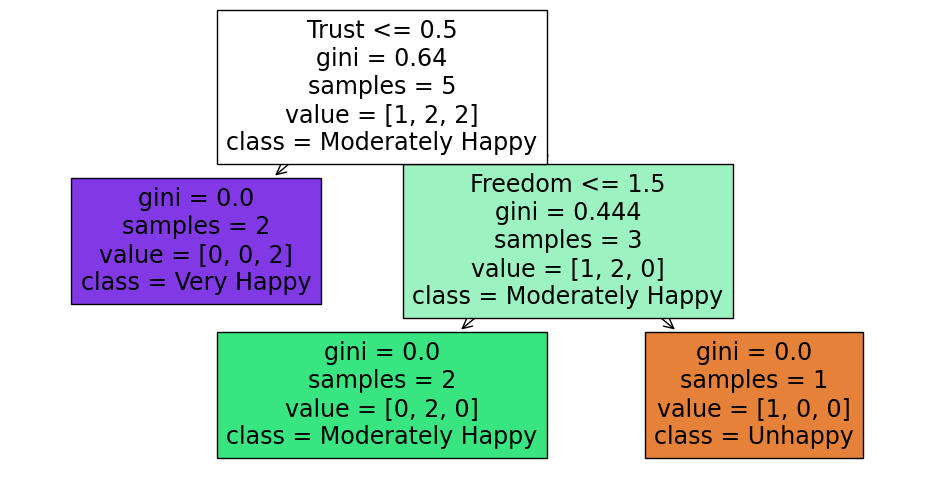

In [30]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Sample categorized dataset
data = {
    'Happiness': ['Low', 'Moderate', 'High', 'High', 'Low'],
    'Economy': ['Weak', 'Stable', 'Strong', 'Strong', 'Weak'],
    'Health': ['Poor', 'Average', 'Good', 'Good', 'Poor'],
    'Freedom': ['Low', 'Moderate', 'High', 'High', 'Low'],
    'Trust': ['Low', 'Moderate', 'High', 'High', 'Low'],
    'Generosity': ['Minimal', 'Moderate', 'Strong', 'Strong', 'Minimal'],
    'Label': ['Unhappy', 'Moderately Happy', 'Very Happy', 'Very Happy', 'Unhappy']
}

df = pd.DataFrame(data)

# Encode categorical values to numerical values
encoder = LabelEncoder()
for column in df.columns:
    df[column] = encoder.fit_transform(df[column])

# Split features and target
X = df.drop(columns=['Label'])  # Features
y = df['Label']  # Target variable

# Train Decision Tree Classifier
tree_model = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_model.fit(X, y)

# Visualize the Decision Tree
plt.figure(figsize=(12, 6))
plot_tree(tree_model, feature_names=X.columns, class_names=['Unhappy', 'Moderately Happy', 'Very Happy'], filled=True)
plt.show()
